**STATISTICAL ANALYSIS WITH POKEMON**

This is my first notebook on Kaggle and I am excited to share my statistical analysis on this Pokemon dataset posted by Alberto Barradas. A big thank you to Alberto!

**Contents:**

1)	Setting up Dataframe and clean data

2)	Type Analysis

3)	Base Stat Analysis

4)	Pokemon Weaknesses

Preliminary: Import Libraries

In [1]:
import pandas as pd # To read csv
import re # Regex
import seaborn as sb # Statistical data visualization
import matplotlib.pyplot as plt

**1) Setting up Dataframe and clean data**

1.1) Read csv and save as a variable

In [2]:
frame = pd.read_csv('../input/Pokemon.csv') # Read csv into dataframe 
frame.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


1.2) Rename column names

Here, we can rename the column names so that all space in the names are removed. Also, We can set the ‘#’ as our index. 

In [3]:
frame.columns = ['#','Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed', 'Generation', 'Legendary']
frame = frame.set_index('#')

1.3) Removing unwanted text

Lets look at the head and tail of the dataframe we have

In [4]:
frame.head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [5]:
frame.tail(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


As you can see from the head and tail of the Dataframe, there is some unnecessary text in front of the Pokemon name. This needs to be removed.

In [6]:
frame.Name = frame.Name.apply(lambda x: re.sub(r'(.+)(Mega.+)',r'\2',x))
frame.Name = frame.Name.apply(lambda x: re.sub(r'(.+)(Primal.+)',r'\2',x))
frame.Name = frame.Name.apply(lambda x: re.sub(r'(HoopaHoopa)(.+)','Hoopa'+r'\2',x))


In [7]:
frame.head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [8]:
frame.tail(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,Hoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,Hoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


1.4) Mega, Primal and Legendary

Not every Pokemon has a Mega form and a Primal form. 

In [9]:
All = frame.loc[(frame['Name'].str.contains('Mega ')==False) & (frame['Name'].str.contains('Primal')==False)] # filter all pokemon without Mega and Primal in name.
All.head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


Omit Legendary Pokemon from our main dataframe we will be using, Legendary Pokemon can have very high base stats, so including those may seem boring.

In [10]:
Poke = All.loc[(All['Legendary']==False)]
PokeL = All.loc[(All['Legendary']==True)]

We can look at the proportion of Pokemon in the dataset that are not Legendary and those that are.

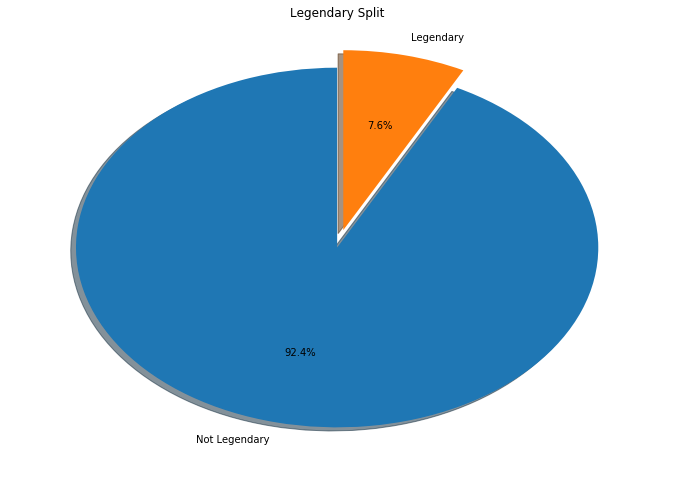

In [11]:
#Pie chart of legendary split
LSplit = [Poke['Name'].count(),PokeL['Name'].count()]
LegendPie = plt.pie(LSplit,labels= ['Not Legendary', 'Legendary'], autopct ='%1.1f%%', shadow = True, startangle = 90,explode=(0, 0.1))
plt.title('Legendary Split',fontsize = 12)
fig = plt.gcf()
fig.set_size_inches(11.7,8.27)
plt.savefig("LegendPie.png")

1.5) Different Generations

Here we will create a dataframe for each Generation. 

In [12]:
Gen1 = Poke.loc[Poke['Generation'] == 1]
Gen2 = Poke.loc[Poke['Generation'] == 2]
Gen3 = Poke.loc[Poke['Generation'] == 3]
Gen4 = Poke.loc[Poke['Generation'] == 4]
Gen5 = Poke.loc[Poke['Generation'] == 5]
Gen6 = Poke.loc[Poke['Generation'] == 6]

**2) Type Analysis**

2.1) Single vs Dual

Let's look at the proportion of Pokemon that are dual types vs those that are not

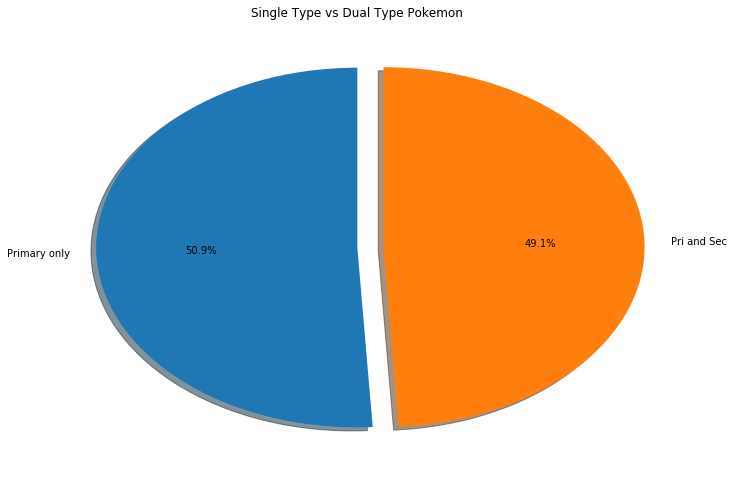

In [13]:
#Pie chart of type 1 vs type 2
TySplit = [Poke['Type1'].count() - Poke['Type2'].count(),Poke['Type2'].count()]
TypePie = plt.pie(TySplit,labels= ['Primary only', 'Pri and Sec'], autopct ='%1.1f%%', shadow = True, startangle = 90,explode=(0, 0.1))
plt.title('Single Type vs Dual Type Pokemon',fontsize = 12)
fig = plt.gcf()
fig.set_size_inches(11.7,8.27)
plt.savefig("TypePie.png")

The pie chart shows that the split is fairly even. We have 50.9% of the Pokemon in this data frame that have only a single PokeType.

Moving on, we can analyse the distribution of primary and secondary Pokemon types. To do this, we can set the colours for the palette. In the game, each Pokemon type has a colour.

In [14]:
type1_colours= ['#6890F0',  # Water
                    '#A8A878',  # Normal
                    '#A8B820',  # Bug
                    '#78C850',  # Grass
                    '#F08030',  # Fire
                    '#F85888',  # Psychic
                    '#F8D030',  # Electric
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#A040A0',  # Poison
                    '#E0C068',  # Ground
                    '#705848',  # Dark
                    '#C03028',  # Fighting
                    '#98D8D8',  # Ice
                    '#B8B8D0',  # Steel
                    '#7038F8',  # Dragon
                    '#EE99AC',  # Fairy
                    '#A890F0',  # Flying
                   ]

type2_colours= ['#78C850',  #None
                '#A890F0',  # Flying
                '#A040A0',  # Poison
                '#E0C068',  # Ground
                '#78C850',  # Grass
                '#F85888',  # Psychic
                '#B8B8D0',  # Steel
                '#C03028',  # Fighting
                '#EE99AC',  # Fairy
                '#705848',  # Dark
                '#B8A038',  # Rock
                '#6890F0',  # Water
                '#705898',  # Ghost
                '#7038F8',  # Dragon
                '#98D8D8',  # Ice
                '#F08030',  # Fire
                '#F8D030',  # Electric
                '#A8A878',  # Normal
                '#A8B820',  # Bug  
                ]


The order of the types is to align with the labels on the x axis in the upcoming Bar plots.

2.2) Primary Types

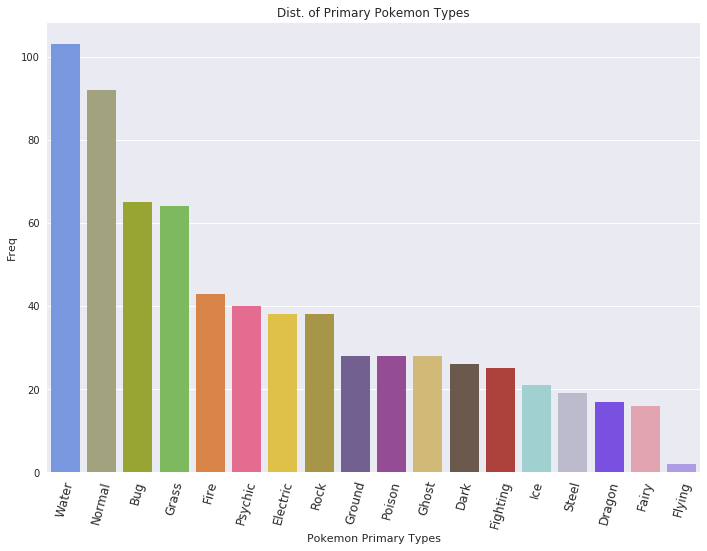

In [15]:
Type1 = pd.value_counts(Poke['Type1'])
sb.set()
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
BarT = sb.barplot(x=Type1.index,y=Type1,data=Poke, palette = type1_colours, ax=ax)
BarT.set_xticklabels(BarT.get_xticklabels(), rotation = 75, fontsize = 12)
BarT.set(xlabel ='Pokemon Primary Types', ylabel='Freq')
BarT.set_title('Dist. of Primary Pokemon Types')
FigBar = BarT.get_figure()
FigBar.savefig("BarPlot_PrimaryType.png")

Water has the highest frequency as a primary Poketype. Flying has the lowest. We can see that the bar plot has taken into consideration the 'type1_colours' to colour the bars appropriately.

2.3) Secondary Types

First, we need to fill the empty 'Type2' entries with 'None', as shown in the pie chart, not all Pokemon have secondary PokeTypes

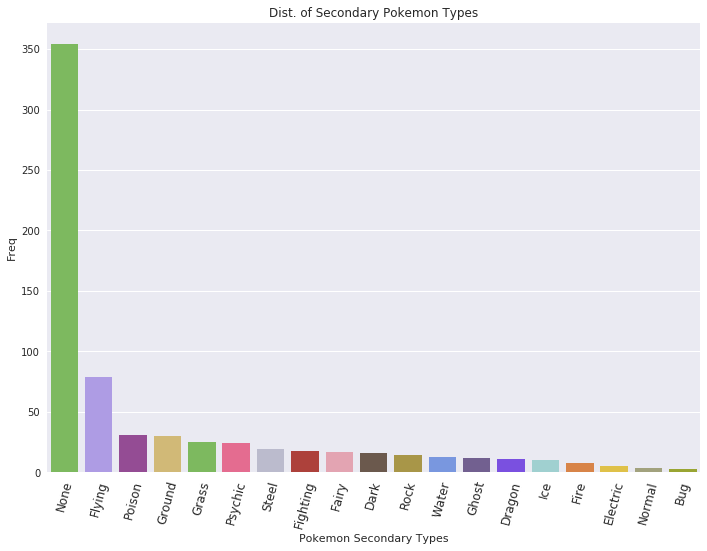

In [16]:
for row in Poke.loc[Poke.Type2.isnull(), 'Type2'].index:
    Poke.at[row, 'Type2'] = 'None'
    
Type2 = pd.value_counts(Poke['Type2'])
sb.set()
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
BarT = sb.barplot(x=Type2.index,y=Type2,data=Poke, palette = type2_colours, ax=ax)
BarT.set_xticklabels(BarT.get_xticklabels(), rotation = 75, fontsize = 12)
BarT.set(xlabel ='Pokemon Secondary Types', ylabel='Freq')
BarT.set_title('Dist. of Secondary Pokemon Types')
FigBar = BarT.get_figure()
FigBar.savefig("BarPlot_SecondaryType.png")

Here, we can see that the 'None' field has the highest frequency. We can also see that the PokeType Flying is the highest secondary PokeType but lowest on the Primary plot. 

**3) Base Stat Analysis**

3.1) Correlation between Base stats

A heat map can be created to depict the correlation between the different attributes. 

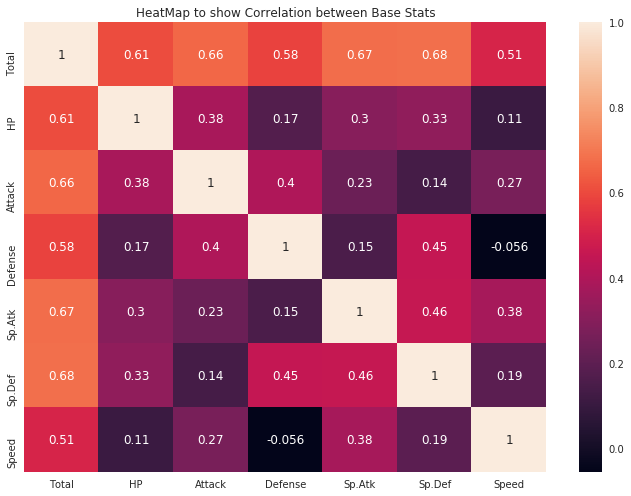

In [17]:
Corr = Poke[['Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
sb.set()
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
CorrelationMap = sb.heatmap(Corr.corr(),annot = True, ax = ax)
CorrelationMap.set(title = 'HeatMap to show Correlation between Base Stats')
FigMap = CorrelationMap.get_figure()
FigMap.savefig("HeatMapCorr.png")

From the heat map, we can see that the correlation between the Sp.Def and Total is 0.68, which is the highest in the matrix (excluding the diagonal). We can go one step further and create a scatter plot of the Sp.Def and Total.

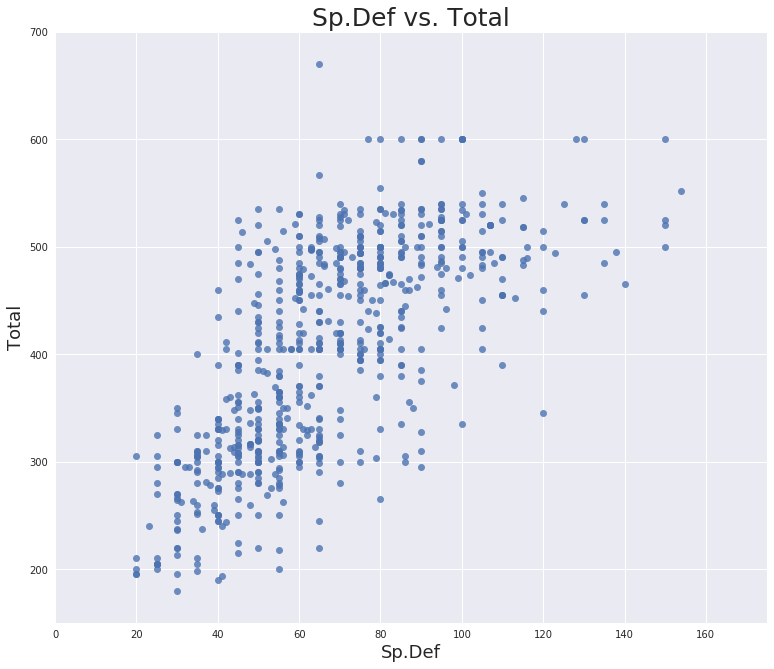

In [18]:
sb.set()
AttvTot = sb.lmplot(x='Sp.Def', y='Total',data=Poke,
                   fit_reg = False, size = 9, aspect = 1.2) #Can Add Hue to distinguish types
plt.ylim(150,700)
plt.xlim(0,175)
plt.title('Sp.Def vs. Total',fontsize = 25)
plt.xlabel('Sp.Def',fontsize = 18)
plt.ylabel('Total',fontsize = 18)
AttvTot.savefig("SP_SpDefvsTot.png")

Overall, for all generations, the correlation metric of 0.68 is echoed as scatter plot shows a positive correlation between the Sp.Def and Total.  

3.2) Attack, Sp.Attack, Defense & Sp.Defense

Attacks (Physical Attack) make contact with the Pokemon and damage is calculated based off of the opponent's Defense.

Special Attacks (Sp.Atk) do not make contact with the Pokemon and damage is calculated based off of the opponents Special Defense.

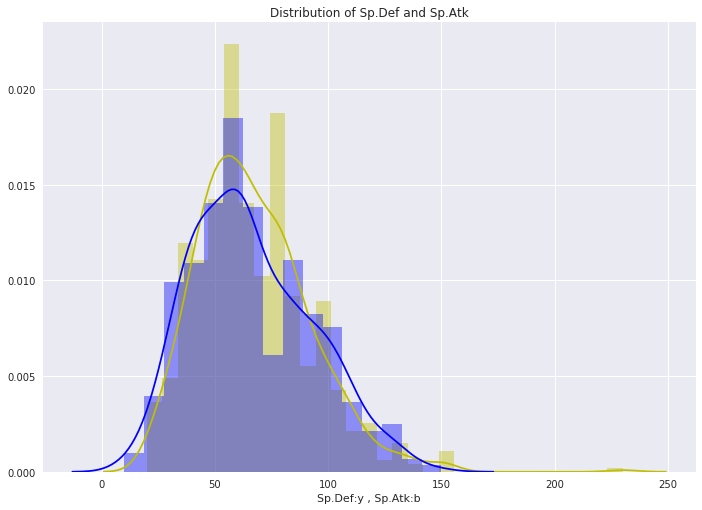

In [19]:
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
SpDhist = sb.distplot(Poke['Sp.Def'],color='y',hist=True,ax=ax)
SpAhist = sb.distplot(Poke['Sp.Atk'],color = 'b', hist = True,ax=ax)
SpAhist.set(title = 'Distribution of Sp.Def and Sp.Atk', xlabel = 'Sp.Def:y , Sp.Atk:b')
FigHist=SpAhist.get_figure()
FigHist.savefig("HistSpDvSpAt.png")

Sp.Def and Sp.Atk have a similar distribution. One could argue that the distribution is positively skewed, as a large number of the Pokemon have relatively low base statistics, with a few Pokemon having a large Sp.Def and/or Sp.Atk stat. Visually, you could argue that Special attack, in blue, has a larger variance than that of Special Defense. One can also see that Sp.Def holds the higher stat of the two, approximately at 225.

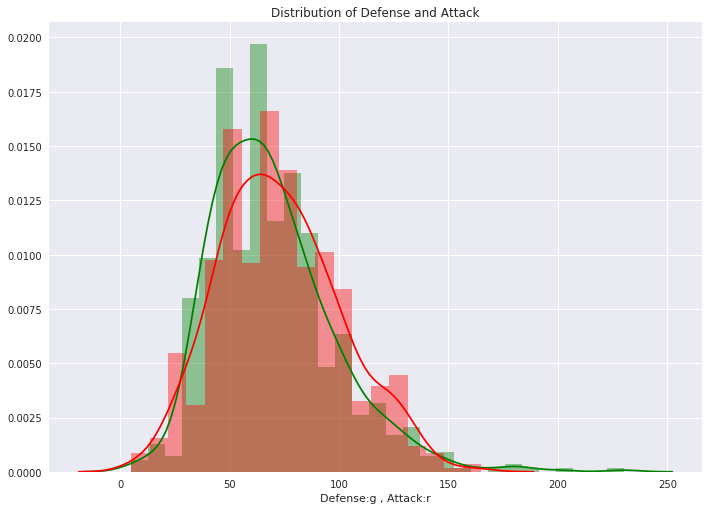

In [20]:
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
Defhist = sb.distplot(Poke['Defense'],color='g',hist=True,ax=ax)
Atthist = sb.distplot(Poke['Attack'],color = 'r', hist = True,ax=ax)
Atthist.set(title = 'Distribution of Defense and Attack', xlabel = 'Defense:g , Attack:r')
FigHist=Atthist.get_figure()
FigHist.savefig("HistDvAtt.png")

Here, the distribution of both attributes are also similar. Also a positive skew is seen. We can see that there is a significant tail end to the Defense stat as opposed to the Attack stat, portraying that the Defense stat has more Pokemon with high Defense stats than Attack. You could argue that the Defense stat has a higher variance than the Attack stat.  

To reinforce the comments made above, we can print the summary statistics of the fields in our dataframe.

In [21]:
DS = Corr.describe() #Summary Statistics
print(DS)

            Total          HP      Attack     Defense      Sp.Atk      Sp.Def  \
count  693.000000  693.000000  693.000000  693.000000  693.000000  693.000000   
mean   406.132756   66.594517   72.825397   69.411255   66.174603   67.194805   
std     98.882015   25.184437   27.878345   28.445003   26.710011   25.107707   
min    180.000000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    318.000000   50.000000   52.000000   50.000000   45.000000   50.000000   
50%    413.000000   64.000000   70.000000   65.000000   61.000000   65.000000   
75%    490.000000   78.000000   90.000000   85.000000   85.000000   80.000000   
max    670.000000  255.000000  165.000000  230.000000  150.000000  230.000000   

            Speed  
count  693.000000  
mean    63.932179  
std     26.532503  
min      5.000000  
25%     45.000000  
50%     60.000000  
75%     84.000000  
max    160.000000  


Here, we can see that the assumption about the variance and skewness of both plots was correct. 

3.3) Min-Max

Create array for base statistics 

In [22]:
stats = ['Total','HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']

Here, we create a user defined function (UDF) for the min and max of base stats. The user can input any frame along with the stats array to find the Pokemon with the highest and lowest stats.

In [23]:
def maxStat(Poke, column):
    statement = ''
    for col in column:
        stat = Poke[col].max()
        name = Poke[Poke[col]==Poke[col].max()]['Name'].values[0] #Find the names linked with the max stat
        gen =  Poke[Poke[col]==Poke[col].max()]['Generation'].values[0] #Find the Gen linked with the max stat
        statement += name+' of Generation '+str(gen)+' has the best '+col+' stat of '+str(stat)+'.\n'
    return statement

# print(maxStat('name of dataframe','array of stats'))

def minStat(Poke, column):
    statement = ''
    for col in column:
        stat = Poke[col].min()
        name = Poke[Poke[col]==Poke[col].min()]['Name'].values[0] #Find the names linked with the min stat
        gen = Poke[Poke[col]==Poke[col].min()]['Generation'].values[0] #Find the Gen linked with the min stat
        statement += name+' of Generation '+str(gen)+' has the worst '+col+' stat of '+str(stat)+'.\n'
    return statement

# print(minStat('name of dataframe','array of stats'))


Examples of using the functions:

In [24]:
print(maxStat(Poke,stats))

Slaking of Generation 3 has the best Total stat of 670.
Blissey of Generation 2 has the best HP stat of 255.
Rampardos of Generation 4 has the best Attack stat of 165.
Shuckle of Generation 2 has the best Defense stat of 230.
AegislashBlade Forme of Generation 6 has the best Sp.Atk stat of 150.
Shuckle of Generation 2 has the best Sp.Def stat of 230.
Ninjask of Generation 3 has the best Speed stat of 160.



In [25]:
print(maxStat(Gen1,stats))

Dragonite of Generation 1 has the best Total stat of 600.
Chansey of Generation 1 has the best HP stat of 250.
Dragonite of Generation 1 has the best Attack stat of 134.
Cloyster of Generation 1 has the best Defense stat of 180.
Alakazam of Generation 1 has the best Sp.Atk stat of 135.
Tentacruel of Generation 1 has the best Sp.Def stat of 120.
Electrode of Generation 1 has the best Speed stat of 140.



In [26]:
print(minStat(Gen2,stats))

Sunkern of Generation 2 has the worst Total stat of 180.
Pichu of Generation 2 has the worst HP stat of 20.
Shuckle of Generation 2 has the worst Attack stat of 10.
Blissey of Generation 2 has the worst Defense stat of 10.
Shuckle of Generation 2 has the worst Sp.Atk stat of 10.
Igglybuff of Generation 2 has the worst Sp.Def stat of 20.
Shuckle of Generation 2 has the worst Speed stat of 5.



In [27]:
print(minStat(Gen3,stats))

Azurill of Generation 3 has the worst Total stat of 190.
Shedinja of Generation 3 has the worst HP stat of 1.
Feebas of Generation 3 has the worst Attack stat of 15.
Carvanha of Generation 3 has the worst Defense stat of 20.
Feebas of Generation 3 has the worst Sp.Atk stat of 10.
Carvanha of Generation 3 has the worst Sp.Def stat of 20.
Trapinch of Generation 3 has the worst Speed stat of 10.



Following this, we can visually compare the base stat total of each generation. 

Box plot:

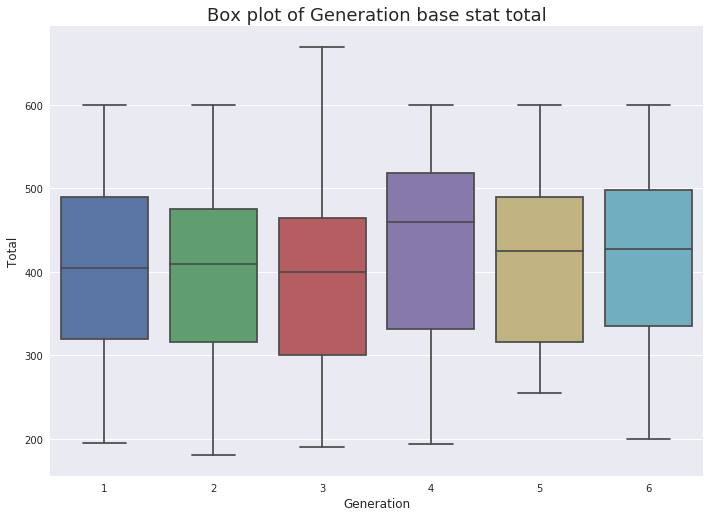

In [28]:
sb.set()
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
bp = sb.boxplot(x='Generation',y='Total', data=Poke, ax=ax)
plt.title('Box plot of Generation base stat total',fontsize = 18)
plt.xlabel('Generation',fontsize = 12)
plt.ylabel('Total',fontsize = 12)
figBP = bp.get_figure()
figBP.savefig("Box_Gen.png")

From this, we can see instantly that Generation 3 has the Pokemon with the highest total base stat. From printing the max stats using our UDF, we know that that Pokemon is Slaking, with a base stat total of 670.

Finally we can look at finding the top 10 Pokemon in a specific Generation, given a Base stat.
Using this UDF, the user can input a generation and a base stat that they wish.

In [29]:
def Top10(Gen1,Bstat):
        subGen = Gen1[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
        Strong = subGen.sort_values([Bstat], ascending = False)
        print(Strong.head(10))
        return

Example of the function:

In [30]:
Top10(Gen1,'Attack')

          Name     Type1   Type2  Total   HP  Attack  Defense  Sp.Atk  Sp.Def  \
#                                                                               
149  Dragonite    Dragon  Flying    600   91     134       95     100     100   
112     Rhydon    Ground    Rock    485  105     130      120      45      45   
68     Machamp  Fighting     NaN    505   90     130       80      65      85   
99     Kingler     Water     NaN    475   55     130      115      50      50   
136    Flareon      Fire     NaN    525   65     130       60      95     110   
127     Pinsir       Bug     NaN    500   65     125      100      55      70   
130   Gyarados     Water  Flying    540   95     125       79      60     100   
106  Hitmonlee  Fighting     NaN    455   50     120       53      35     110   
76       Golem      Rock  Ground    495   80     120      130      55      65   
141   Kabutops      Rock   Water    495   60     115      105      65      70   

     Speed  
#           
1

**4)	Pokemon Weaknesses**

Here, I looked at creating a user defined function to set the weakness of each Pokemon type for each generation. 
While creating this function, I had to assume that each Pokemon can only learn moves that are the same as their Primary or Secondary type, and that a weakness only counts if it is Super-effective. The user can input any Generation as an argument and the function will allow the user to input a type and base stat.
The function will print the top 6 Pokemon that can combat that type.

In [31]:
def Weakness(Gen1,Bstat,arg2):
    if arg2 == 'Water':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Grass') ^ (Gen1['Type1']=='Electric') ^ 
                                (Gen1['Type2'] == 'Grass') ^ (Gen1['Type2']=='Electric')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Normal':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Fighting') ^ 
                                (Gen1['Type2'] == 'Fighting')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Fire':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Water') ^ (Gen1['Type1']=='Ground') ^ (Gen1['Type1']=='Rock') ^ 
                                (Gen1['Type2'] == 'Water') ^ (Gen1['Type2']=='Ground') ^ (Gen1['Type2']=='Rock')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Electric':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Ground') ^ 
                                (Gen1['Type2'] == 'Ground')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Grass':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Fire') ^ (Gen1['Type1']=='Ice') ^ (Gen1['Type1']=='Poison') ^ (Gen1['Type1'] == 'Flying') ^ (Gen1['Type1']=='Bug') ^ 
                                (Gen1['Type2'] == 'Fire') ^ (Gen1['Type2']=='Ice') ^ (Gen1['Type2']=='Poison') ^ (Gen1['Type2'] == 'Flying') ^ (Gen1['Type2']=='Bug')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Ice':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Fire') ^ (Gen1['Type1']=='Fighting') ^ (Gen1['Type1']=='Rock') ^ (Gen1['Type1'] == 'Steel') ^ 
                                (Gen1['Type2'] == 'Fire') ^ (Gen1['Type2']=='Fighting') ^ (Gen1['Type2']=='Rock') ^ (Gen1['Type2'] == 'Steel')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Fighting':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Flying') ^ (Gen1['Type1']=='Psychic') ^ (Gen1['Type1']=='Fairy') ^ 
                                (Gen1['Type2'] == 'Flying') ^ (Gen1['Type2']=='Psychic') ^ (Gen1['Type2']=='Fairy')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Poison':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Ground') ^ (Gen1['Type1']=='Psychic') ^ 
                                (Gen1['Type2'] == 'Ground') ^ (Gen1['Type2']=='Psychic')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Ground':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Water') ^ (Gen1['Type1']=='Grass') ^ (Gen1['Type1']=='Ice') ^ 
                                (Gen1['Type2'] == 'Water') ^ (Gen1['Type2']=='Grass') ^ (Gen1['Type2']=='Ice')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Flying':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Electric') ^ (Gen1['Type1']=='Ice') ^ (Gen1['Type1']=='Rock') ^ 
                                (Gen1['Type2'] == 'Electric') ^ (Gen1['Type2']=='Ice') ^ (Gen1['Type2']=='Rock')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Psychic':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Bug') ^ (Gen1['Type1']=='Ghost') ^ (Gen1['Type1']=='Dark') ^ 
                                (Gen1['Type2'] == 'Bug') ^ (Gen1['Type2']=='Ghost') ^ (Gen1['Type2']=='Dark')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Bug':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Fire') ^ (Gen1['Type1']=='Flying') ^ (Gen1['Type1']=='Rock') ^ 
                                (Gen1['Type2'] == 'Fire') ^ (Gen1['Type2']=='Flying') ^ (Gen1['Type2']=='Rock')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Rock':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Water') ^ (Gen1['Type1']=='Grass') ^ (Gen1['Type1']=='Fighting') ^ (Gen1['Type1'] == 'Ground') ^ (Gen1['Type1']=='Steel') ^ 
                                (Gen1['Type2'] == 'Water') ^ (Gen1['Type2']=='Grass') ^ (Gen1['Type2']=='Fighting') ^ (Gen1['Type2'] == 'Ground') ^ (Gen1['Type2']=='Steel')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Ghost':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Ghost') ^ (Gen1['Type1']=='Dark') ^ 
                                (Gen1['Type2'] == 'Ghost') ^ (Gen1['Type2']=='Dark')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Dragon':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Ice') ^ (Gen1['Type1']=='Dragon') ^ (Gen1['Type1']=='Fairy') ^ 
                                (Gen1['Type2'] == 'Ice') ^ (Gen1['Type2']=='Dragon') ^ (Gen1['Type2']=='Fairy')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Dark':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Figthing') ^ (Gen1['Type1']=='Bug') ^ (Gen1['Type1']=='Fairy') ^ 
                                (Gen1['Type2'] == 'Fighting') ^ (Gen1['Type2']=='Bug') ^ (Gen1['Type2']=='Fairy')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Steel':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Fire') ^ (Gen1['Type1']=='Fighting') ^ (Gen1['Type1']=='Ground') ^ 
                                (Gen1['Type2'] == 'Fire') ^ (Gen1['Type2']=='Fighting') ^ (Gen1['Type2']=='Ground')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    elif arg2 == 'Fairy':
            Weakness = Gen1.loc[(Gen1['Type1'] == 'Poison') ^ (Gen1['Type1']=='Steel') ^ 
                                (Gen1['Type2'] == 'Poison') ^ (Gen1['Type2']=='Steel')]
            subGen = Weakness[['Name','Type1', 'Type2','Total' ,'HP', 'Attack','Defense','Sp.Atk','Sp.Def','Speed']]
            Strong = subGen.sort_values([Bstat], ascending = False)
            print(Strong.head(6))
    return

Example of the function:

In [32]:
Weakness(Gen1,'Attack','Water')

           Name     Type1    Type2  Total  HP  Attack  Defense  Sp.Atk  \
#                                                                        
71   Victreebel     Grass   Poison    490  80     105       65     100   
103   Exeggutor     Grass  Psychic    520  95      95       85     125   
47     Parasect       Bug    Grass    405  60      95       80      60   
70   Weepinbell     Grass   Poison    390  65      90       50      85   
26       Raichu  Electric      NaN    485  60      90       55      90   
125  Electabuzz  Electric      NaN    490  65      83       57      95   

     Sp.Def  Speed  
#                   
71       70     70  
103      65     55  
47       80     30  
70       45     55  
26       80    110  
125      85    105  


A list of 6 was chosen to emulate the 6 Pokemon allowed in a party.

Thank you for reading this notebook, I had alot of fun working with this dataset!